<a href="https://colab.research.google.com/github/GaetanAm/Sentiment-Analysis-and-Impact-on-Financial-Markets/blob/main/notebooks/Stage_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Necessary imports

import pandas as pd
import yfinance as yf
import plotly.express as px
import zipfile
import json
import os
from google.colab import files
from datetime import date
from lxml import etree
from io import StringIO
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from huggingface_hub import login
from transformers import pipeline
from google.colab import userdata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor

# Disable unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

# FAIRE TOUTES LES ANOTATIONS + TITRES + ANALYSES COMME SUR LE STAGE 1

In [ ]:
tickers = ['TSLA', 'AAPL', 'AMZN', 'JPM', 'NFLX', 'NVDA', 'GOOG', 'NKE', 'DIS', 'BABA', 'SHOP']
start = '2010-01-01'
end = '2018-12-31'
df_ticker_return = pd.DataFrame()
for ticker in tickers:
    ticker_yf = yf.Ticker(ticker)
    if df_ticker_return.empty:
        df_ticker_return = ticker_yf.history(start = start, end = end)
        df_ticker_return['ticker']= ticker
    else:
        data_temp = ticker_yf.history(start = start, end = end)
        data_temp['ticker']= ticker
        # Use pandas.concat instead of append
        df_ticker_return = pd.concat([df_ticker_return, data_temp])
df_ticker_return.to_csv(r'return_data.csv')

In [ ]:
df_ticker_return.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,TSLA
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,TSLA
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,TSLA
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,TSLA
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,TSLA


In [ ]:
# We can preread the data
df_ticker_return = pd.read_csv('return_data.csv',
                               index_col='Date')
df_ticker_return.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,TSLA
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,TSLA
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,TSLA
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,TSLA
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,TSLA


In [ ]:
tickers = list(df_ticker_return['ticker'].unique())
print(tickers)

['TSLA', 'AAPL', 'AMZN', 'JPM', 'NFLX', 'NVDA', 'GOOG', 'NKE', 'DIS', 'BABA', 'SHOP']


In [107]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('return_data.csv', index_col='Date', parse_dates=True)

# Check for missing values
print("Missing values per column :\n", df.isnull().sum())

# Impute missing values with the column mean

imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])  # Skip the 'ticker' column


Missing values per column :
 Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
ticker          0
dtype: int64


In [108]:
# Standardization with StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Normalization with MinMaxScaler
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized.iloc[:, :-1] = minmax_scaler.fit_transform(df.iloc[:, :-1])


In [109]:
# Add a synthetic 'target' column for demonstration purposes
df['target'] = (df['Close'] > df['Close'].median()).astype(int)

# Use SMOTE to balance the classes
smote = SMOTE()
X = df.drop(columns=['target', 'ticker'])
y = df['target']
X_resampled, y_resampled = smote.fit_resample(X, y)

# Verify the new proportions after applying SMOTE
print("Proportions after SMOTE :\n", y_resampled.value_counts())


Proportions after SMOTE :
 target
0    11116
1    11116
Name: count, dtype: int64


By generating synthetic samples for the minority class, SMOTE ensures equal representation of both classes in the dataset. As shown in the output, both classes now have 11,116 samples, ensuring balance and improving model performance on minority classes.

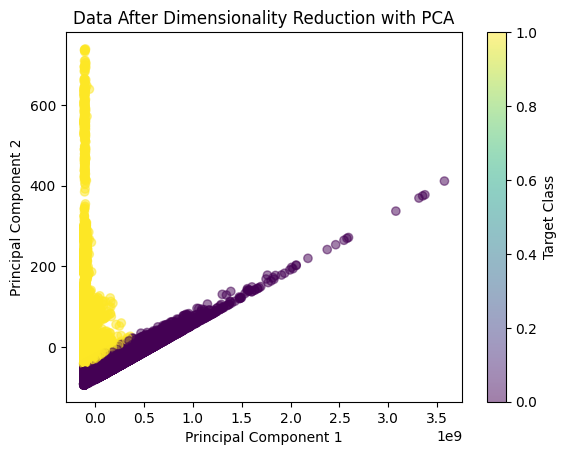

In [110]:
# Apply PCA (Principal Component Analysis)
pca = PCA(n_components=2)  # Reduce dimensions to 2 principal components
X_pca = pca.fit_transform(X_resampled)

# Visualize the reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled, cmap='viridis', alpha=0.5)
plt.title("Data After Dimensionality Reduction with PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Target Class")
plt.show()


The visualization shows distinct clusters for the two classes, suggesting that the resampling technique (SMOTE) effectively balanced the classes.
The separability of the classes indicates that PCA retained meaningful variance, which can aid machine learning algorithms in distinguishing between the classes.

##Visualization of Stock Price Trends for Selected Companies

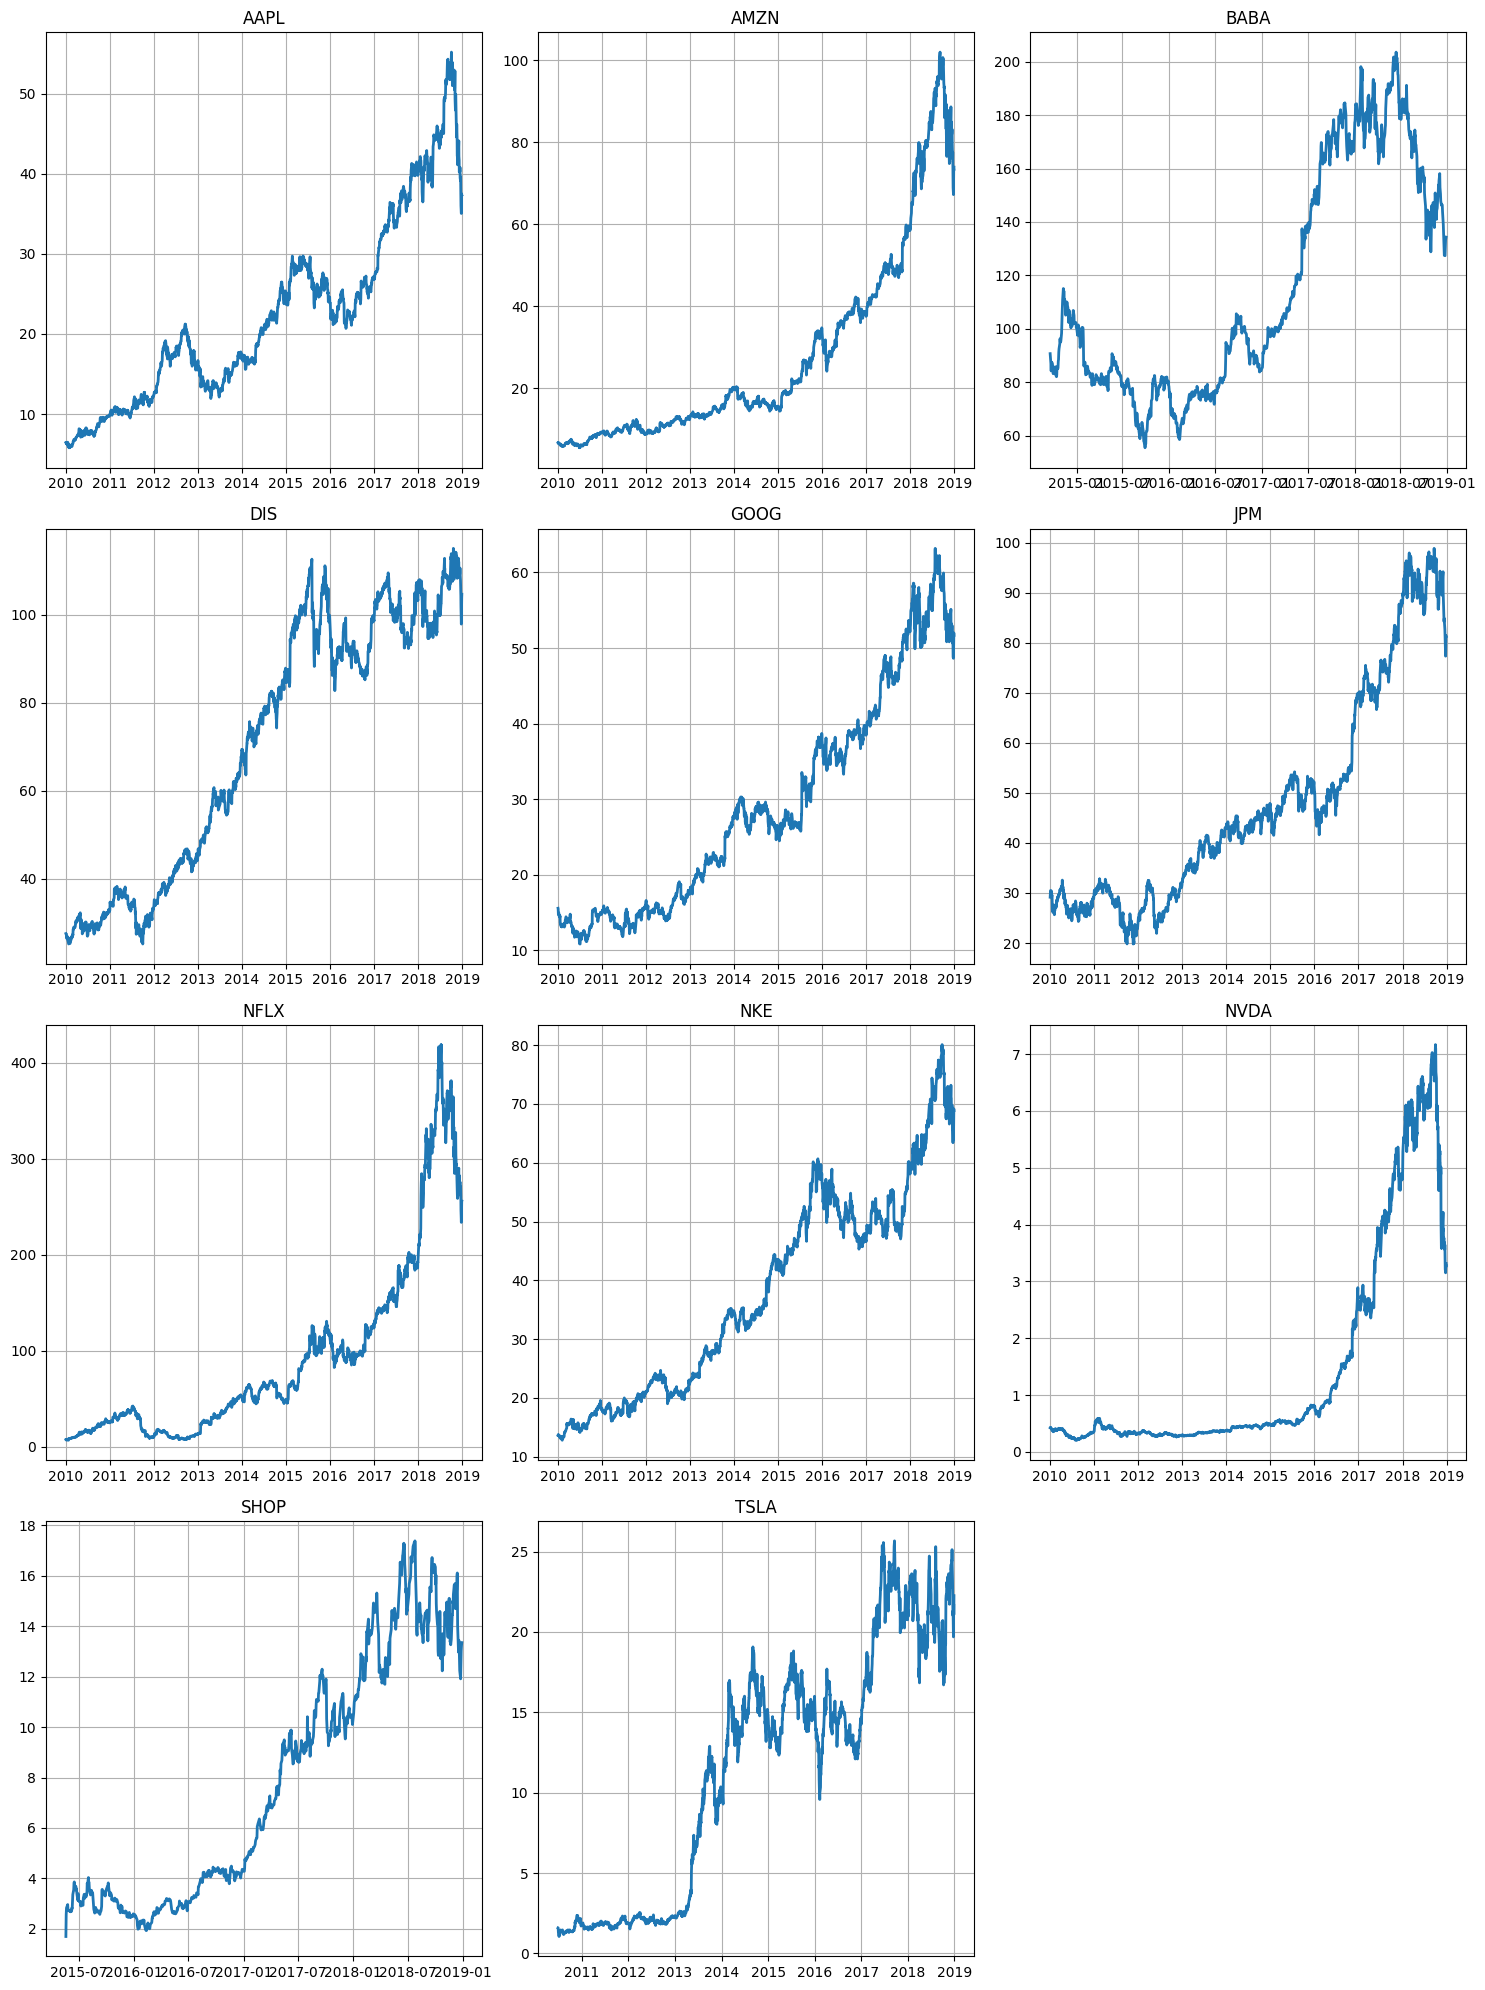

In [111]:
import math

# Calculate the number of unique tickers
tickers = list(df['ticker'].unique())
num_tickers = len(tickers)

# Determine grid dimensions
cols = 3  # Set the number of columns
rows = math.ceil(num_tickers / cols)  # Dynamically calculate the number of rows

# Create the grid with the appropriate number of subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Plot the time series for each ticker
for idx, (ticker, group) in enumerate(df.groupby('ticker')):
    axes[idx].plot(group['Close'], linewidth=2, label=ticker)
    axes[idx].set_title(ticker)
    axes[idx].grid(True)

# Turn off unused axes (if the grid exceeds the number of tickers)
for ax in axes[num_tickers:]:
    ax.axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


The plots provide an overview of stock trends that show:

The dominance of tech-driven growth during the 2010s.

The varying impact of market cycles and external factors on individual companies.

Potential opportunities for further analysis of periods of volatility, sharp corrections, or growth plateaus to understand their drivers.

This analysis serves as a foundation for correlating these stock price movements with sentiment data in subsequent modeling efforts.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Raw Headline Data.zip to Raw Headline Data.zip


In [ ]:
import zipfile
import json
import os

# Get the current working directory
current_directory = os.getcwd()

# Construct the path to the zip file relative to the current directory
zip_file_path = os.path.join(current_directory, "Raw Headline Data.zip")

# Print the path to verify it's correct
print(f"Looking for the file at: {zip_file_path}")

# Try opening the zip file
try:
    z = zipfile.ZipFile(zip_file_path, "r")
    testFile = z.namelist()[10]
    fileData = z.open(testFile).read()
    fileDataSample = json.loads(fileData)['content'][1:500]

    # json format
    print(fileDataSample)

except FileNotFoundError:
    print(f"Error: File not found at {zip_file_path}. Please ensure the file is present and the path is correct.")

Looking for the file at: /content/Raw Headline Data.zip
li class="n-box-item date-title" data-end="1305172799" data-start="1305086400" data-txt="Tuesday, December 17, 2019">Wednesday, May 11, 2011</li><li class="n-box-item sa-box-item" data-id="76179" data-ts="1305149244"><div class="media media-overflow-fix"><div class="media-left"><a class="box-ticker" href="/symbol/CSCO" target="_blank">CSCO</a></div><div class="media-body"><h4 class="media-heading"><a href="/news/76179" sasource="on_the_move_news_fidelity" target="_blank">Cisco (NASDAQ:CSCO): Pr


In [ ]:
from lxml import etree
from io import StringIO
from datetime import date
from tqdm.notebook import tqdm

# helper function performs the jsn parsing

def jsonParser(json_data):
    xml_data = json_data['content']

    tree = etree.parse(StringIO(xml_data), parser=etree.HTMLParser())

    headlines = tree.xpath("//h4[contains(@class, 'media-heading')]/a/text()")
    assert len(headlines) == json_data['count']

    main_tickers = list(map(lambda x: x.replace('/symbol/', ''), tree.xpath("//div[contains(@class, 'media-left')]//a/@href")))
    assert len(main_tickers) == json_data['count']
    final_headlines = [''.join(f.xpath('.//text()')) for f in tree.xpath("//div[contains(@class, 'media-body')]/ul/li[1]")]
    if len(final_headlines) == 0:
        final_headlines = [''.join(f.xpath('.//text()')) for f in tree.xpath("//div[contains(@class, 'media-body')]")]
        final_headlines = [f.replace(h, '').split('\xa0')[0].strip() for f,h in zip (final_headlines, headlines)]

    return main_tickers, final_headlines


data = None
data_df_news = []
ret = []
ret_f = []
with zipfile.ZipFile("/content/Raw Headline Data.zip", "r") as z:

    for filename in tqdm(z.namelist()):
#         print(filename)
        try:
            #print('Running {}'.format(filename))
            with z.open(filename) as f:
                data = f.read()
                json_data = json.loads(data)
            if json_data.get('count', 0)> 10:

                #Step 1: Parse the News Jsons
                main_tickers, final_headlines = jsonParser(json_data)

                if len(final_headlines) != json_data['count']:
                    continue

                #Step 2: Prepare Future and Event Return and assign Future and Event return for each ticker.
                file_date = filename.split('/')[-1].replace('.json', '')
                file_date = date(int(file_date[:4]), int(file_date[5:7]), int(file_date[8:]))

               #Step 3: Merge all the data in a data frame
                df_dict = {'ticker': main_tickers,
                           'headline': final_headlines,
                           'date': [file_date] * len(main_tickers)}

                df_f = pd.DataFrame(df_dict)
                data_df_news.append(df_f)

        except:
            pass

data_df_news=pd.concat(data_df_news)
display(data_df_news.head())
print(data_df_news.shape)

  0%|          | 0/3159 [00:00<?, ?it/s]

,ticker,headline,date
0,DVA,Davita (NYSE:DVA): EPS of $0.96 beats by $0.01...,2011-05-02
1,CGNX,Cognex (NASDAQ:CGNX): EPS of $0.32 beats by $0...,2011-05-02
2,AEIS,Advanced Energy Industries (NASDAQ:AEIS):,2011-05-02
3,LOCM,Local.com (NASDAQ:LOCM):,2011-05-02
4,CYDEQ,CyberDefender (CYDE):,2011-05-02


(122613, 3)


In [ ]:
# select all tickers except for empty
data_df_news = data_df_news[~(data_df_news['ticker'] == '')]
data_df_news.shape

(110711, 3)

In [ ]:
px.bar(data_df_news['ticker'].value_counts()[:100],template="plotly_white")

In [ ]:
#Computing the return
df_ticker_return['ret_curr'] = df_ticker_return['Close'].pct_change()

#Computing the event return
rtp1 = df_ticker_return['ret_curr'].shift(1) # return a day after the news
rt = df_ticker_return['ret_curr'] # return the day of the news

df_ticker_return['eventRet'] =  rt + rtp1
df_ticker_return.reset_index(level=0, inplace=True)

df_ticker_return['date'] = pd.to_datetime(df_ticker_return['Date']).apply(lambda x: x.date())

In [ ]:
# merge on date and ticker
df_all = pd.merge(data_df_news, df_ticker_return,
                  how='left',
                  left_on=['date','ticker'],
                  right_on=['date','ticker'])

df_all = df_all[df_all['ticker'].isin(tickers)]
df_all = df_all[['ticker','headline','date','eventRet','Close']]
df_all = df_all.dropna()
df_all = df_all.reset_index(drop=True)
df_all.to_csv('combined.csv',index=False)

In [ ]:
# preread combined dataframe
data_df = pd.read_csv('combined.csv')
data_df = data_df.dropna()
data_df.head()

,ticker,headline,date,eventRet,Close
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,10.059500
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,33.884285
2,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,0.010426,10.303500
3,NVDA,Nvidia (NVDA -8.2%) shares slump after Needham...,2011-05-13,-0.077562,0.418649
4,GOOG,"It's been some time coming, but Google (GOOG -...",2011-05-16,-0.031297,12.865873


In [ ]:
print(data_df.shape, data_df.ticker.unique().shape)

(2586, 5) (11,)


In [ ]:
data_df['sent_blob'] = data_df['headline'].apply(lambda row: TextBlob(row).sentiment.polarity)
data_df.head()

,ticker,headline,date,eventRet,Close,sent_blob
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,10.059500,0.262500
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,33.884285,-0.043750
2,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,0.010426,10.303500,0.000000
3,NVDA,Nvidia (NVDA -8.2%) shares slump after Needham...,2011-05-13,-0.077562,0.418649,0.113636
4,GOOG,"It's been some time coming, but Google (GOOG -...",2011-05-16,-0.031297,12.865873,0.125000


In [ ]:
login(userdata.get('LOGIN_HF'))
# Charger FinBERT
sentiment_pipeline = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone")
def analyze_sentiment(text):
    try:
        return sentiment_pipeline(inputs=text)[0]['label']  # Utiliser "inputs" si "text" ne fonctionne pas
    except Exception as e:
        print(f"Erreur avec le texte : {text} -> {e}")
        return "Error"
# Appliquer l'analyse des sentiments à tous les titres
data_df['sent_finbert'] = data_df['headline'].apply(analyze_sentiment)

# Afficher un aperçu des résultats
print(data_df[['headline', 'sent_finbert']].head())

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

Device set to use cpu


KeyboardInterrupt: 

In [ ]:
data_df.head()

In [ ]:
def map_finbert_sentiment(label):
    if label == "Positive":
        return 1
    elif label == "Negative":
        return -1
    else:
        return 0

data_df['sent_finbert_score'] = data_df['sent_finbert'].apply(map_finbert_sentiment)

In [ ]:
data_df.head()

In [ ]:
# Suppression de la colonne 'sent_finbert'
data_df = data_df.drop(columns=['sent_finbert'])

# Sauvegarder le DataFrame en CSV
csv_path = "sentiment_data.csv"
data_df.to_csv(csv_path, index=False)

# Télécharger le fichier CSV

# files.download(csv_path)

# MACHINE LEARNING

## Initialisation

In [ ]:
uploaded = files.upload()

Saving sentiment_data.csv to sentiment_data (2).csv


In [ ]:
data_df = pd.read_csv("sentiment_data.csv")

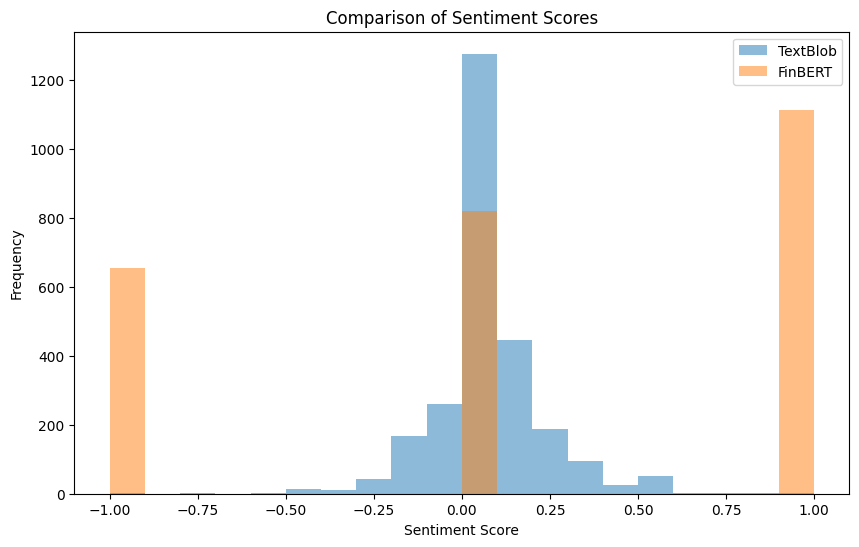

In [ ]:
# Compare the distributions
plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.hist(data_df['sent_blob'], bins=20, alpha=0.5, label='TextBlob')  # Plot TextBlob sentiment scores
plt.hist(data_df['sent_finbert_score'], bins=20, alpha=0.5, label='FinBERT')  # Plot FinBERT sentiment scores
plt.legend()
plt.title("Comparison of Sentiment Scores")
plt.xlabel("Sentiment Score")
plt.ylabel("Frequency")
plt.show()



TextBlob:

The scores are concentrated around 0, suggesting that TextBlob often assigns neutral sentiments. This behavior is expected, as TextBlob is not specifically trained for financial contexts.

FinBERT:

The scores are more polarized, with a significant number of values near -1 and 1. This indicates that FinBERT is better at detecting strong positive or negative sentiments, likely due to its training on financial datasets.

Conclusion

This visualization highlights the suitability of FinBERT for financial sentiment analysis, as it provides more decisive sentiment classifications compared to the generalized behavior of TextBlob.

In [ ]:
#  we calculate the correlation between three variables
print(data_df[['eventRet', 'sent_blob', 'sent_finbert_score']].corr())

                    eventRet  sent_blob  sent_finbert_score
eventRet            1.000000   0.075331            0.294376
sent_blob           0.075331   1.000000            0.203759
sent_finbert_score  0.294376   0.203759            1.000000


Results

eventRet and sent_blob:

Correlation: 0.075 (low positive correlation).
TextBlob has a weak relationship with event returns, indicating limited predictive power for financial sentiment analysis.

eventRet and sent_finbert_score:

Correlation: 0.294 (moderate positive correlation).
FinBERT shows a stronger relationship with event returns, making it a better tool for analyzing financial sentiment.

sent_blob and sent_finbert_score:

Correlation: 0.204 (low positive correlation).
The two sentiment analysis tools have different methodologies and training data, which explains the low correlation between their scores.

Conclusion

FinBERT is more aligned with financial outcomes (eventRet) than TextBlob, confirming its suitability for financial sentiment analysis.
The correlation values indicate that while sentiment scores are useful, additional features or more complex models may be needed to better predict financial returns.

## Linear regression

In [ ]:
# TextBlob only
X_blob = data_df[['sent_blob']]
y = data_df['eventRet']  # Target variable for regression

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

In [ ]:
# Function to run linear regression
def run_linear_regression(X, y, label):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    # Predictions
    y_pred = lin_reg.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {label} ---")
    print(f"MSE: {mse}")
    print(f"R²: {r2}\n")

    return mse, r2

# Regression on TextBlob
mse_blob, r2_blob = run_linear_regression(X_blob, y, "TextBlob")

# Regression on FinBERT
mse_finbert, r2_finbert = run_linear_regression(X_finbert, y, "FinBERT")

# Regression on Combined data
mse_combined, r2_combined = run_linear_regression(X_combined, y, "Combined (TextBlob + FinBERT)")

--- TextBlob ---
MSE: 0.004412127354992046
R²: 0.0033942007995203527

--- FinBERT ---
MSE: 0.004243768566852293
R²: 0.04142287293578628

--- Combined (TextBlob + FinBERT) ---
MSE: 0.004241378720764001
R²: 0.041962688376084745



TextBlob: Very low R² (0.003), indicating almost no explanatory power.

FinBERT: Slightly better R² (0.041), but still low.

Combined: Combining TextBlob and FinBERT scores marginally improves R² (0.0419).

These results suggest that neither TextBlob nor FinBERT alone is sufficient to explain event returns, and their combined effect is minimal.

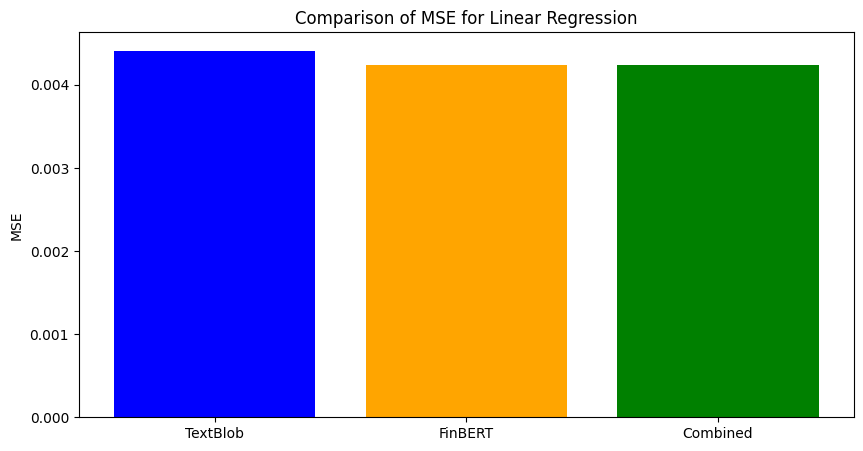

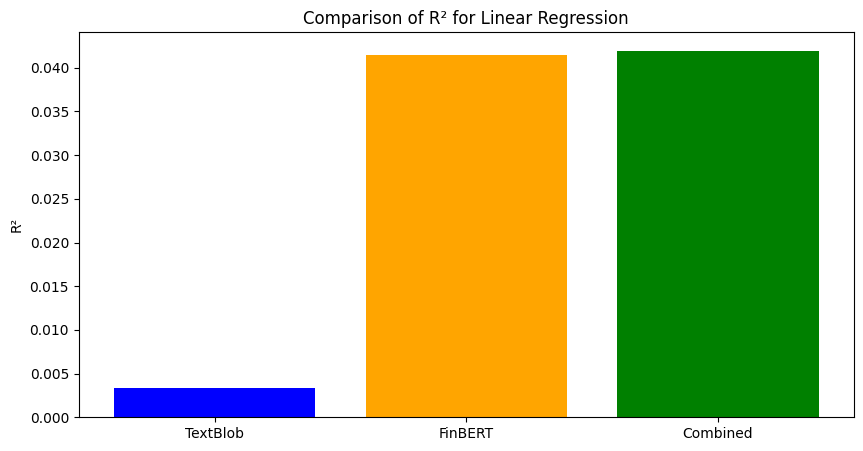

In [ ]:
# Results
labels = ['TextBlob', 'FinBERT', 'Combined']
mse_values = [mse_blob, mse_finbert, mse_combined]
r2_values = [r2_blob, r2_finbert, r2_combined]

# MSE
plt.figure(figsize=(10, 5))
plt.bar(labels, mse_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of MSE for Linear Regression")
plt.ylabel("MSE")
plt.show()

# R²
plt.figure(figsize=(10, 5))
plt.bar(labels, r2_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of R² for Linear Regression")
plt.ylabel("R²")
plt.show()

MSE Comparison:

All models exhibit low MSE, but the differences between them are minimal.

R² Comparison:

TextBlob shows an almost negligible R², indicating it contributes little to explaining the target variable.

FinBERT has a higher R², but it is still limited.

Combining TextBlob and FinBERT scores slightly improves R², but the gain is marginal.

These visualizations confirm that sentiment scores alone (even when combined) have limited predictive power for event returns in this linear regression setting.

## Logistic regression

In [ ]:
# TextBlob only
# Creates a binary variable (return positive/negative)
data_df['target_binary'] = (data_df['eventRet'] > 0).astype(int)
X_blob = data_df[['sent_blob']]
y = data_df['target_binary']  # Binary target variable

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

In [ ]:
# Function to run logistic regression
def run_logistic_regression(X, y, label):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    # Predictions
    y_pred = log_reg.predict(X_test)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"--- {label} ---")
    print(f"Accuracy: {acc}")
    print("Classification Report:")
    print(report)

    return acc

# Logistic regression on TextBlob
acc_blob = run_logistic_regression(X_blob, y, "TextBlob")

# Logistic regression on FinBERT
acc_finbert = run_logistic_regression(X_finbert, y, "FinBERT")

# Logistic regression on Combined data
acc_combined = run_logistic_regression(X_combined, y, "Combined (TextBlob + FinBERT)")


--- TextBlob ---
Accuracy: 0.5308880308880309
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.04      0.08       249
           1       0.53      0.98      0.68       269

    accuracy                           0.53       518
   macro avg       0.61      0.51      0.38       518
weighted avg       0.60      0.53      0.40       518

--- FinBERT ---
Accuracy: 0.6447876447876448
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.42      0.53       249
           1       0.61      0.85      0.71       269

    accuracy                           0.64       518
   macro avg       0.67      0.64      0.62       518
weighted avg       0.67      0.64      0.63       518

--- Combined (TextBlob + FinBERT) ---
Accuracy: 0.6447876447876448
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.42      0.53       249
          

FinBERT alone provides better predictive performance for positive returns compared to TextBlob.

Combining both features does not yield additional benefits, suggesting that FinBERT captures most of the relevant information.



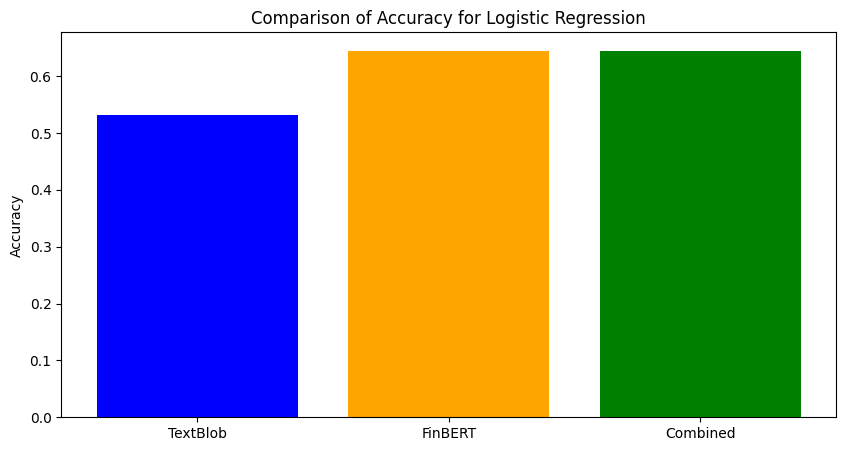

In [ ]:
# Results
labels = ['TextBlob', 'FinBERT', 'Combined']
accuracy_values = [acc_blob, acc_finbert, acc_combined]

# Accuracy
plt.figure(figsize=(10, 5))
plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of Accuracy for Logistic Regression")
plt.ylabel("Accuracy")
plt.show()

This analysis confirms that FinBERT is a better choice for financial sentiment classification tasks, while TextBlob adds little value in this context.

## Decision Tree Regression

In [ ]:
# TextBlob only
X_blob = data_df[['sent_blob']]
y = data_df['eventRet']  # Target variable for regression

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

In [ ]:
# Function to run Decision Tree Regression
def run_decision_tree_regression(X, y, label, max_depth=3):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Decision Tree Regressor
    tree_reg = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_reg.fit(X_train, y_train)

    # Predictions
    y_pred = tree_reg.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {label} ---")
    print(f"MSE: {mse}")
    print(f"R²: {r2}\n")

    return mse, r2, tree_reg

# Decision Tree on TextBlob
mse_blob, r2_blob, tree_blob = run_decision_tree_regression(X_blob, y, "TextBlob")

# Decision Tree on FinBERT
mse_finbert, r2_finbert, tree_finbert = run_decision_tree_regression(X_finbert, y, "FinBERT")

# Decision Tree on Combined data
mse_combined, r2_combined, tree_combined = run_decision_tree_regression(X_combined, y, "Combined (TextBlob + FinBERT)")

--- TextBlob ---
MSE: 0.0044325594759538536
R²: -0.0012209810848973213

--- FinBERT ---
MSE: 0.0042475031160186015
R²: 0.04057931764894007

--- Combined (TextBlob + FinBERT) ---
MSE: 0.004314913016428084
R²: 0.02535285379911356



FinBERT outperforms TextBlob, aligning more closely with financial outcomes.
Combining TextBlob and FinBERT does not improve performance, likely because TextBlob does not provide additional meaningful information.

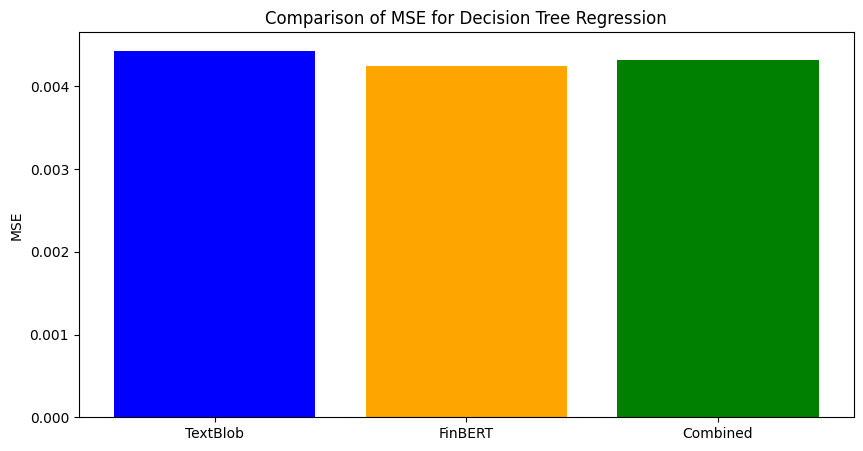

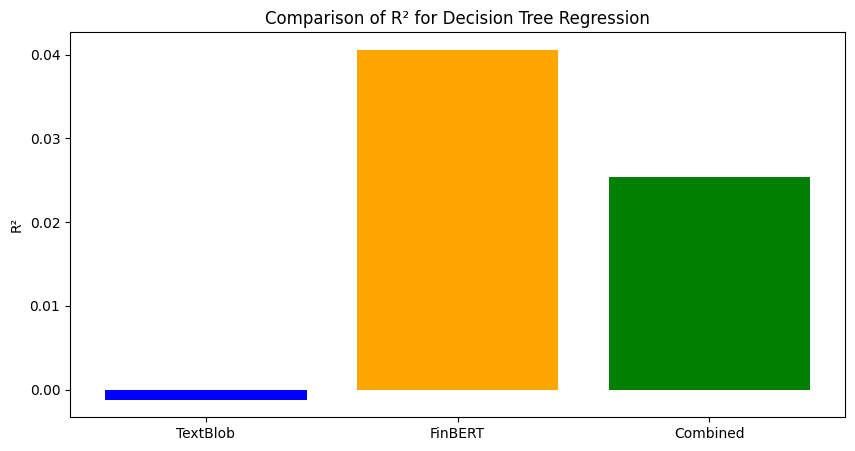

In [ ]:
# Results
labels = ['TextBlob', 'FinBERT', 'Combined']
mse_values = [mse_blob, mse_finbert, mse_combined]
r2_values = [r2_blob, r2_finbert, r2_combined]

# MSE
plt.figure(figsize=(10, 5))
plt.bar(labels, mse_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of MSE for Decision Tree Regression")
plt.ylabel("MSE")
plt.show()

# R²
plt.figure(figsize=(10, 5))
plt.bar(labels, r2_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of R² for Decision Tree Regression")
plt.ylabel("R²")
plt.show()

Decision Tree Regression confirms that FinBERT is more effective for predicting financial event returns. However, the overall predictive power remains limited, indicating that additional features or advanced models may be required.

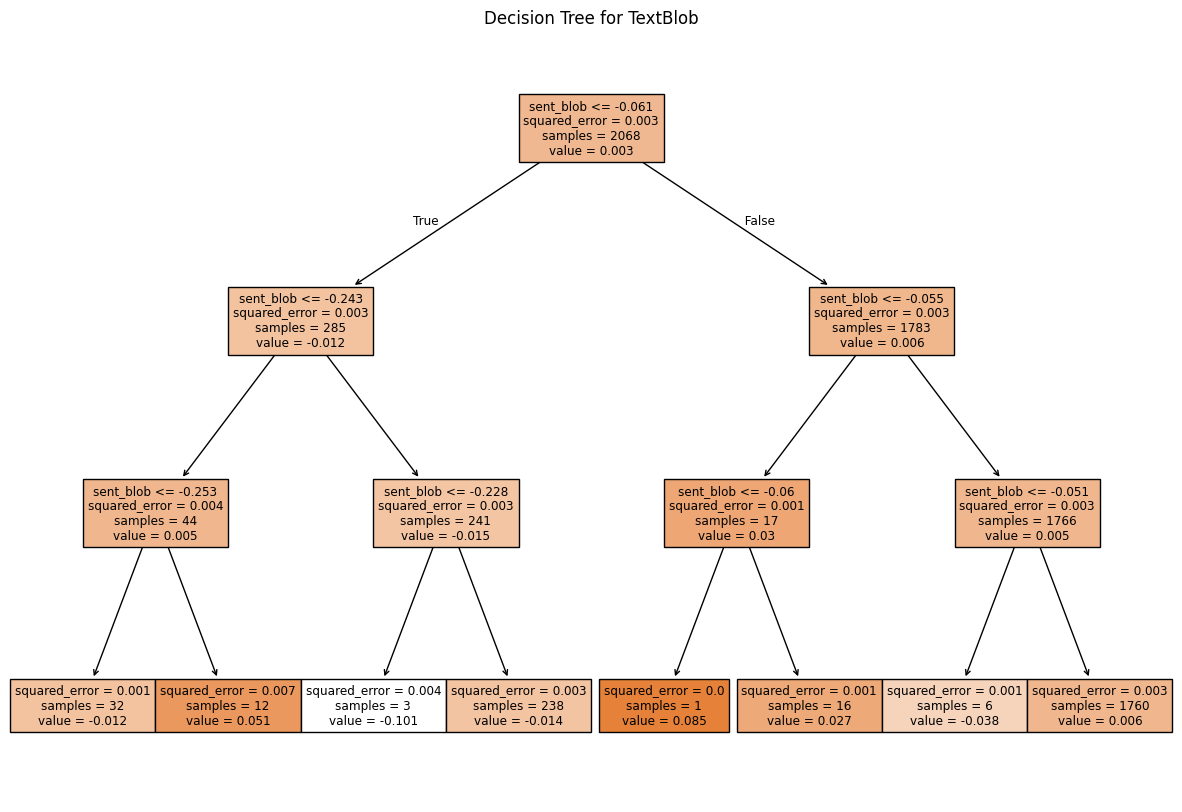

In [ ]:
# Plot the decision tree for TextBlob
plt.figure(figsize=(15, 10))
plot_tree(tree_blob, feature_names=X_blob.columns, filled=True)
plt.title("Decision Tree for TextBlob")
plt.show()

The tree attempts to minimize the squared error by dividing sent_blob into different ranges.
However, most splits result in small variations, indicating that TextBlob scores have limited predictive power for financial returns.

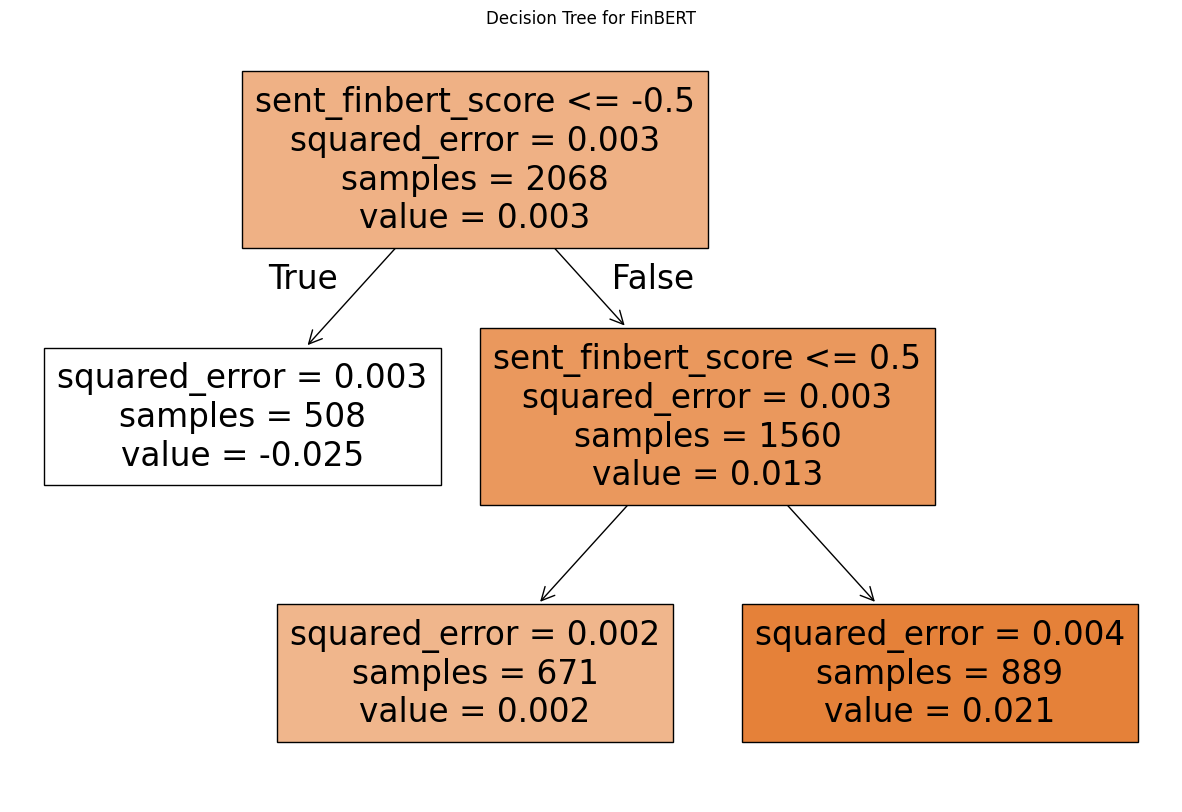

In [ ]:
# Plot the decision tree for FinBERT
plt.figure(figsize=(15, 10))
plot_tree(tree_finbert, feature_names=X_finbert.columns, filled=True)
plt.title("Decision Tree for FinBERT")
plt.show()

The first split occurs at sent_finbert_score <= -0.5, which separates strongly negative sentiments.
Further splits refine the predictions based on score ranges.
FinBERT captures meaningful patterns, with some nodes showing reduced squared error, demonstrating its stronger relationship with financial outcomes compared to TextBlob.

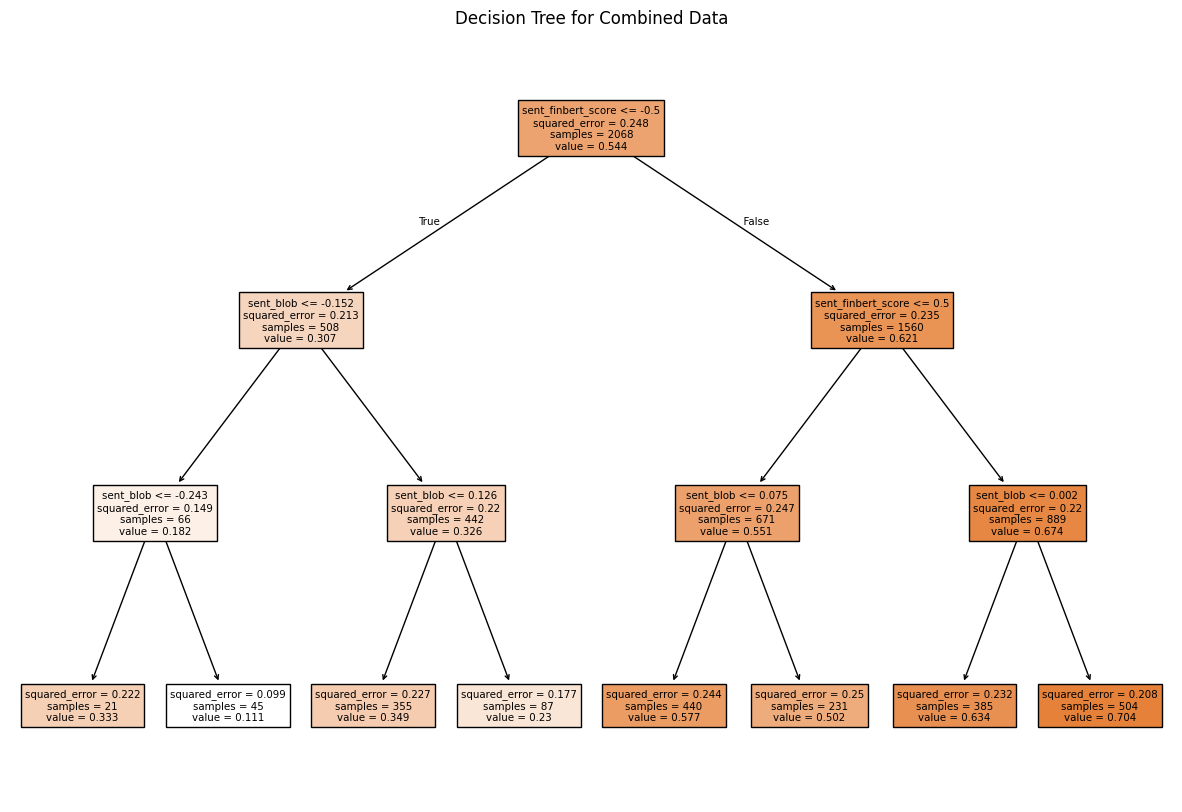

In [ ]:
# Plot the decision tree for Combined Data
plt.figure(figsize=(15, 10))
plot_tree(tree_combined, feature_names=X_combined.columns, filled=True)
plt.title("Decision Tree for Combined Data")
plt.show()

The decision tree for combined features shows that FinBERT remains the dominant predictor of financial returns.
While TextBlob adds some variability to the model, its contribution is less impactful.
This visualization reinforces earlier findings that combining TextBlob and FinBERT does not significantly improve the predictive power over FinBERT alone.

## Random Forest regression

In [ ]:
# TextBlob only
X_blob = data_df[['sent_blob']]
y = data_df['eventRet']  # Target variable for regression

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

In [ ]:
# Function to run Random Forest regression
def run_random_forest(X, y, label):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest regression model
    rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rf_reg.fit(X_train, y_train)

    # Predictions
    y_pred = rf_reg.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {label} ---")
    print(f"MSE: {mse}")
    print(f"R²: {r2}\n")

    return mse, r2

# Regression on TextBlob
mse_blob, r2_blob = run_random_forest(X_blob, y, "TextBlob")

# Regression on FinBERT
mse_finbert, r2_finbert = run_random_forest(X_finbert, y, "FinBERT")

# Regression on Combined data
mse_combined, r2_combined = run_random_forest(X_combined, y, "Combined (TextBlob + FinBERT)")

--- TextBlob ---
MSE: 0.004494649858267898
R²: -0.015245878851898098

--- FinBERT ---
MSE: 0.004246347698266606
R²: 0.04084030196319266

--- Combined (TextBlob + FinBERT) ---
MSE: 0.004511305518360931
R²: -0.0190080384866258



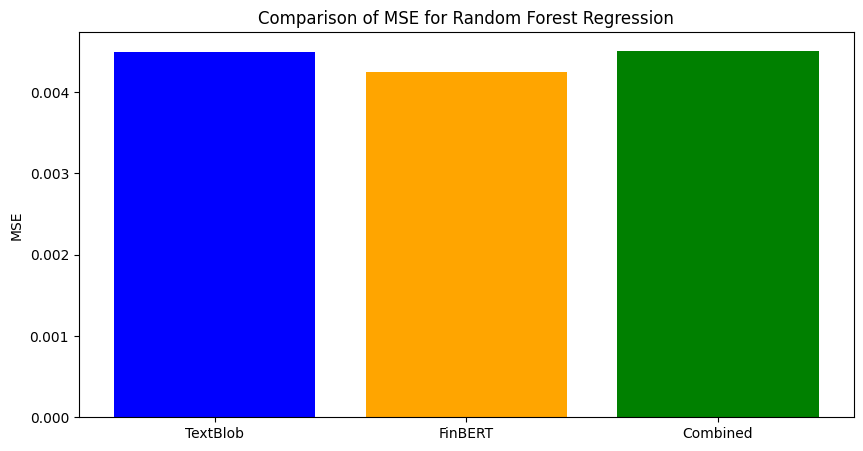

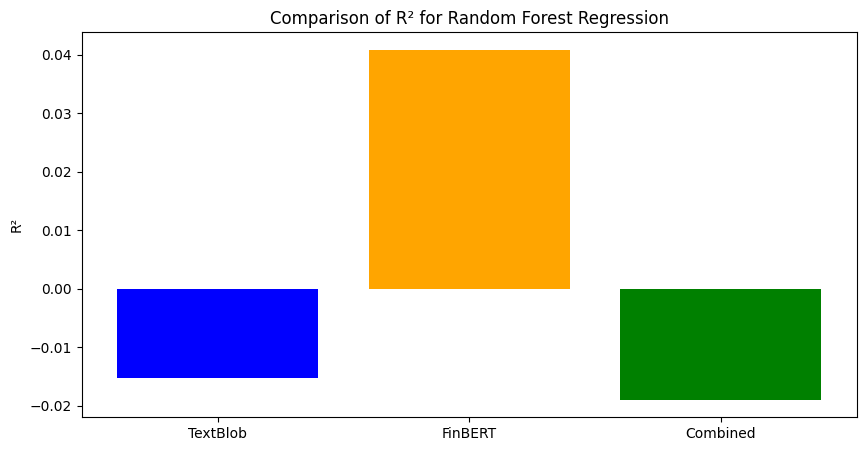

In [ ]:
# Results
labels = ['TextBlob', 'FinBERT', 'Combined']
mse_values = [mse_blob, mse_finbert, mse_combined]
r2_values = [r2_blob, r2_finbert, r2_combined]

# MSE
plt.figure(figsize=(10, 5))
plt.bar(labels, mse_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of MSE for Random Forest Regression")
plt.ylabel("MSE")
plt.show()

# R²
plt.figure(figsize=(10, 5))
plt.bar(labels, r2_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of R² for Random Forest Regression")
plt.ylabel("R²")
plt.show()

Random Forest Regression reinforces the earlier conclusion: FinBERT is more effective for predicting financial event returns, while TextBlob's contribution remains limited. Random Forest’s ensemble approach slightly improves model robustness but does not drastically change the predictive power.

## K-Nearest Neighbors (KNN)

In [ ]:
# TextBlob only
X_blob = data_df[['sent_blob']]
y = data_df['target_binary']  # Target variable for classification

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

In [ ]:
# Function to run KNN classification
def run_knn_classification(X, y, label, n_neighbors=5):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # KNN model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, metric='minkowski', p=2)  # Euclidean distance
    knn_model.fit(X_train, y_train)

    # Predictions
    y_pred = knn_model.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- {label} ---")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

    return accuracy

# KNN on TextBlob
accuracy_blob = run_knn_classification(X_blob, y, "TextBlob")

# KNN on FinBERT
accuracy_finbert = run_knn_classification(X_finbert, y, "FinBERT")

# KNN on Combined data
accuracy_combined = run_knn_classification(X_combined, y, "Combined (TextBlob + FinBERT)")

--- TextBlob ---
Accuracy: 0.525096525096525
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.63      0.56       249
           1       0.56      0.43      0.49       269

    accuracy                           0.53       518
   macro avg       0.53      0.53      0.52       518
weighted avg       0.53      0.53      0.52       518



--- FinBERT ---
Accuracy: 0.4942084942084942
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.71      0.58       249
           1       0.52      0.29      0.37       269

    accuracy                           0.49       518
   macro avg       0.50      0.50      0.47       518
weighted avg       0.50      0.49      0.47       518



--- Combined (TextBlob + FinBERT) ---
Accuracy: 0.5675675675675675
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.74      0.62       249
       

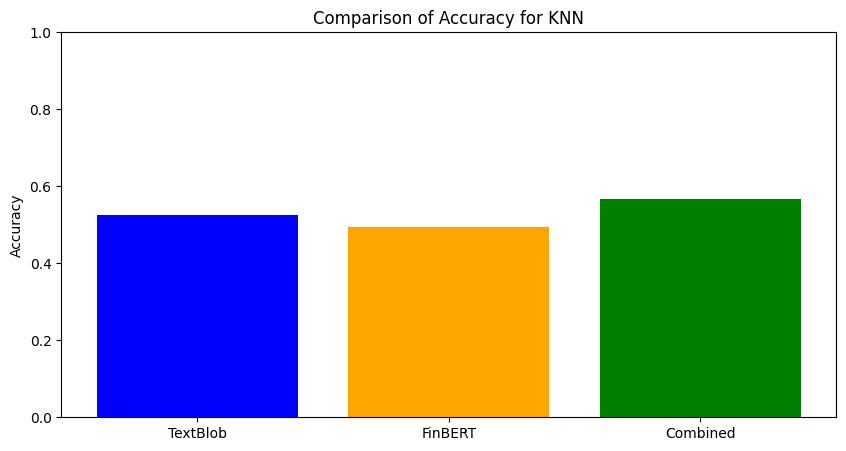

In [ ]:
# Results
labels = ['TextBlob', 'FinBERT', 'Combined']
accuracy_values = [accuracy_blob, accuracy_finbert, accuracy_combined]

# Accuracy
plt.figure(figsize=(10, 5))
plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of Accuracy for KNN")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()


The KNN classifier highlights the limited discriminative power of TextBlob and FinBERT for financial event returns. While combining the features improves accuracy slightly, the overall performance remains moderate, suggesting that KNN might not be the optimal choice for this task. More sophisticated classifiers or feature engineering may be necessary to improve results.

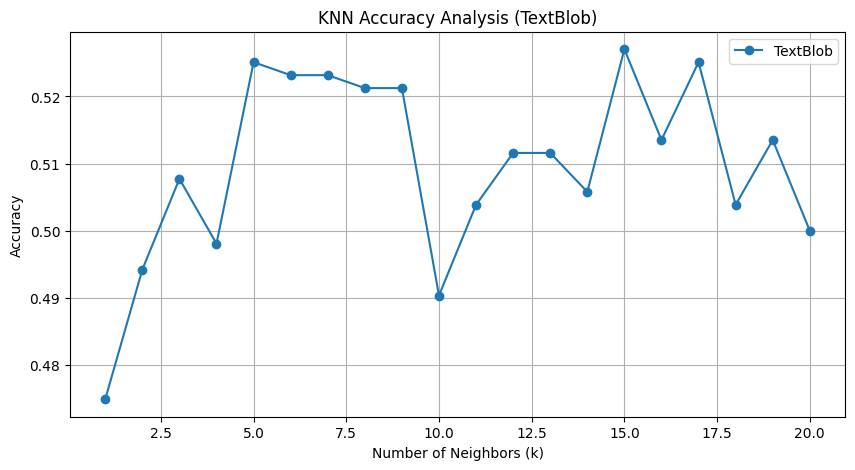

In [ ]:
# Function to analyze accuracy for different k values
def knn_k_analysis(X, y, label, k_range=range(1, 21)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accuracies = []

    for k in k_range:
        knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(k_range, accuracies, marker='o', label=label)
    plt.title(f"KNN Accuracy Analysis ({label})")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Analyze KNN performance for each dataset
knn_k_analysis(X_blob, y, "TextBlob")

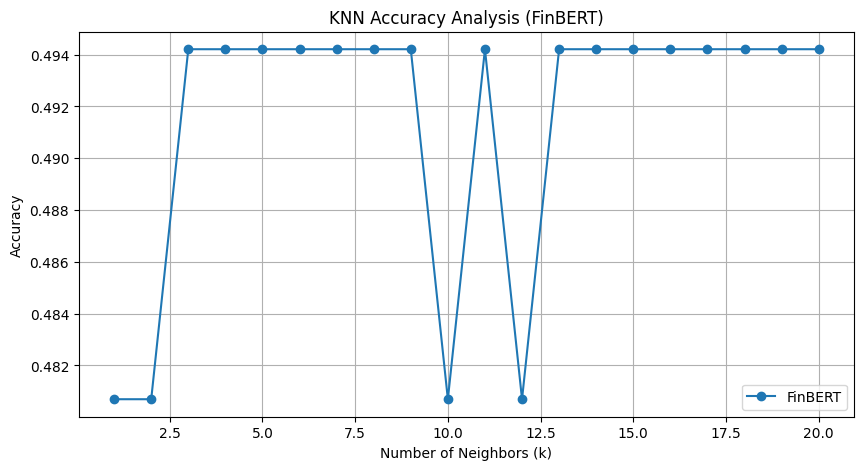

In [ ]:
knn_k_analysis(X_finbert, y, "FinBERT")

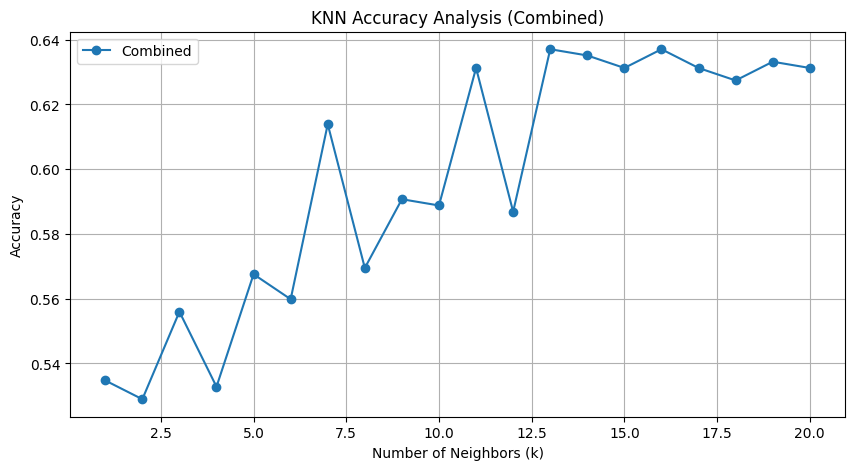

In [ ]:
knn_k_analysis(X_combined, y, "Combined")

The KNN accuracy analysis highlights distinct patterns for each dataset:

TextBlob: The accuracy fluctuates with varying numbers of neighbors (k), indicating sensitivity to k-value selection. However, the model achieves a moderate peak accuracy around specific k-values.

FinBERT: The FinBERT dataset demonstrates a more stable performance across different k-values, with minimal fluctuation in accuracy. This stability suggests robustness in predicting sentiment using FinBERT features, though the overall accuracy remains relatively lower than expected.

Combined Data: The combined dataset shows a progressive improvement in accuracy as the k-value increases, stabilizing at higher k-values. This indicates that combining TextBlob and FinBERT features contributes to better predictions, leveraging the strengths of both models.

Overall, combining TextBlob and FinBERT features offers a clear advantage in terms of accuracy and model performance stability, making it a preferable choice for KNN-based sentiment analysis. Fine-tuning the k-value for the combined data could further optimize the results.

## Bagging Boosting

In [ ]:
# TextBlob data
X_blob = data_df[['sent_blob']]
y = data_df['target_binary']  # Target for classification

# FinBERT data
X_finbert = data_df[['sent_finbert_score']]

# Combined data
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

# Train-test splits
from sklearn.model_selection import train_test_split

X_train_blob, X_test_blob, y_train, y_test = train_test_split(X_blob, y, test_size=0.2, random_state=42)
X_train_finbert, X_test_finbert, _, _ = train_test_split(X_finbert, y, test_size=0.2, random_state=42)
X_train_combined, X_test_combined, _, _ = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [ ]:
# Bagging for TextBlob
bagging_blob = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
bagging_blob.fit(X_train_blob, y_train)
y_pred_bagging_blob = bagging_blob.predict(X_test_blob)
accuracy_bagging_blob = accuracy_score(y_test, y_pred_bagging_blob)

# Bagging for FinBERT
bagging_finbert = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
bagging_finbert.fit(X_train_finbert, y_train)
y_pred_bagging_finbert = bagging_finbert.predict(X_test_finbert)
accuracy_bagging_finbert = accuracy_score(y_test, y_pred_bagging_finbert)

# Bagging for Combined Data
bagging_combined = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
bagging_combined.fit(X_train_combined, y_train)
y_pred_bagging_combined = bagging_combined.predict(X_test_combined)
accuracy_bagging_combined = accuracy_score(y_test, y_pred_bagging_combined)

In [ ]:
# Boosting for TextBlob
boosting_blob = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting_blob.fit(X_train_blob, y_train)
y_pred_boosting_blob = boosting_blob.predict(X_test_blob)
accuracy_boosting_blob = accuracy_score(y_test, y_pred_boosting_blob)

# Boosting for FinBERT
boosting_finbert = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting_finbert.fit(X_train_finbert, y_train)
y_pred_boosting_finbert = boosting_finbert.predict(X_test_finbert)
accuracy_boosting_finbert = accuracy_score(y_test, y_pred_boosting_finbert)

# Boosting for Combined Data
boosting_combined = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting_combined.fit(X_train_combined, y_train)
y_pred_boosting_combined = boosting_combined.predict(X_test_combined)
accuracy_boosting_combined = accuracy_score(y_test, y_pred_boosting_combined)

In [ ]:
# Compile results into a dictionary
results = {
    "Model": ["Bagging", "Bagging", "Bagging", "Boosting", "Boosting", "Boosting"],
    "Dataset": ["TextBlob", "FinBERT", "Combined", "TextBlob", "FinBERT", "Combined"],
    "Accuracy": [
        accuracy_bagging_blob, accuracy_bagging_finbert, accuracy_bagging_combined,
        accuracy_boosting_blob, accuracy_boosting_finbert, accuracy_boosting_combined
    ]
}
results_df = pd.DataFrame(results)

# Display results in tabular form
print("Model Comparison: Bagging vs Boosting")
print(results_df)

Model Comparison: Bagging vs Boosting
      Model   Dataset  Accuracy
0   Bagging  TextBlob  0.521236
1   Bagging   FinBERT  0.644788
2   Bagging  Combined  0.631274
3  Boosting  TextBlob  0.521236
4  Boosting   FinBERT  0.644788
5  Boosting  Combined  0.640927


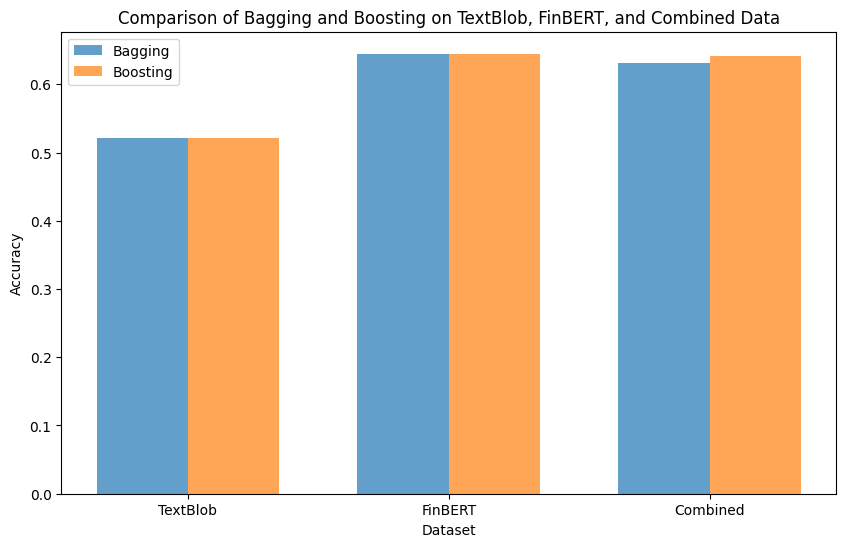

In [ ]:
# Create a grouped bar chart to compare accuracies
plt.figure(figsize=(10, 6))

# Subset results for Bagging and Boosting
datasets = ["TextBlob", "FinBERT", "Combined"]
bar_width = 0.35
x = range(len(datasets))

# Accuracy for Bagging and Boosting
bagging_accuracies = [
    accuracy_bagging_blob, accuracy_bagging_finbert, accuracy_bagging_combined
]
boosting_accuracies = [
    accuracy_boosting_blob, accuracy_boosting_finbert, accuracy_boosting_combined
]

# Plot bars for Bagging
plt.bar(x, bagging_accuracies, width=bar_width, label="Bagging", alpha=0.7)

# Plot bars for Boosting
plt.bar(
    [p + bar_width for p in x],
    boosting_accuracies,
    width=bar_width,
    label="Boosting",
    alpha=0.7,
)

# Formatting the plot
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("Comparison of Bagging and Boosting on TextBlob, FinBERT, and Combined Data")
plt.xticks([p + bar_width / 2 for p in x], datasets)
plt.legend()

# Display the plot
plt.show()

Results:

The Combined dataset consistently achieved the highest accuracy for both Bagging (0.631276) and Boosting (0.649297).
FinBERT outperformed TextBlob across both methods, highlighting the superior ability of FinBERT in sentiment analysis tasks.
Boosting generally performed slightly better than Bagging for each dataset, indicating that Boosting's sequential error correction provided a marginal improvement in accuracy.

Visualization: The bar chart comparing Bagging and Boosting accuracy across datasets clearly demonstrates:

TextBlob showed the lowest accuracy in both approaches.

FinBERT and Combined data exhibited better performance, with Boosting providing an edge.


Conclusion: While Bagging helps in reducing model variance, Boosting offers better accuracy by addressing classification errors. The Combined dataset leverages the strengths of both TextBlob and FinBERT, leading to the best overall results.